In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("data/StudentsPerformance.csv")

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [5]:
df.shape

(1000, 8)

In [6]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [10]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

# Exploring Data 

In [14]:
print("Categories in Gender variable", df['gender'].unique())
print("Categories in Lunch variable", df['lunch'].unique())
print("Categories in test preparation course", df['test preparation course'].unique())
print("Categoires in Parental level of education", df['parental level of education'].unique())
print("Categories in race/ethinicity", df['race/ethnicity'].unique())

Categories in Gender variable ['female' 'male']
Categories in Lunch variable ['standard' 'free/reduced']
Categories in test preparation course ['none' 'completed']
Categoires in Parental level of education ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in race/ethinicity ['group B' 'group C' 'group A' 'group D' 'group E']


In [15]:
# count of numeric features and categorical features and their names

numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print("We have {} Numerical features : {}".format(len(numerical_features), numerical_features))
print("We have {} Categorical features : {}".format(len(categorical_features), categorical_features))

We have 3 Numerical features : ['math score', 'reading score', 'writing score']
We have 5 Categorical features : ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [16]:
# Adding columns to find avg and total score of each student
df['total_score'] = df['math score'] + df['reading score'] + df['writing score']
df['avg_score'] = df['total_score'] / 3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,avg_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [24]:
# Count of people who got full marks in each subject

maths_full = df[df['math score'] == 100]['avg_score'].count()
writing_full = df[df['writing score'] == 100]['avg_score'].count()
reading_full = df[df['reading score'] == 100]['avg_score'].count()
print("Count of students who got full marks in maths  : ",maths_full)
print("Count of students who got full marks in Writing: ",writing_full)
print("Count of students who got full marks in Reading:",reading_full)

Count of students who got full marks in maths  :  7
Count of students who got full marks in Writing:  14
Count of students who got full marks in Reading: 17


In [25]:
# Count of the people who got less than 20 marks
maths_less_20 = df[df['math score'] < 20]['avg_score'].count()
writing_less_20 = df[df['writing score'] < 20]['avg_score'].count()
reading_less_20 = df[df['reading score'] < 20]['avg_score'].count()

print("Count of students who got less than 20 in maths:",maths_less_20)
print("Count of students who got less than 20 in writing:",writing_less_20)
print("Count of students who got less than 20 in reading:",reading_less_20)

Count of students who got less than 20 in maths: 4
Count of students who got less than 20 in writing: 3
Count of students who got less than 20 in reading: 1


In [31]:
students_with_full_marks = df[(df['math score'] == 100) & (df['reading score'] == 100) & (df['writing score'] == 100)]['avg_score'].count()
print(students_with_full_marks)

3


In [35]:
print("Average score in maths subject :", df['math score'].mean())
print("Average score in reading subject :",df['reading score'].mean())
print("Average score in writing subject :",df['writing score'].mean())

Average score in maths subject : 66.089
Average score in reading subject : 69.169
Average score in writing subject : 68.054


## Insights on what we have explored till now

- 3 Students got full marks in all three exams.
- Students performed well in reading and the average is also is high.
- Studnets least performed in maths and the average is less when compared to other two subjects.

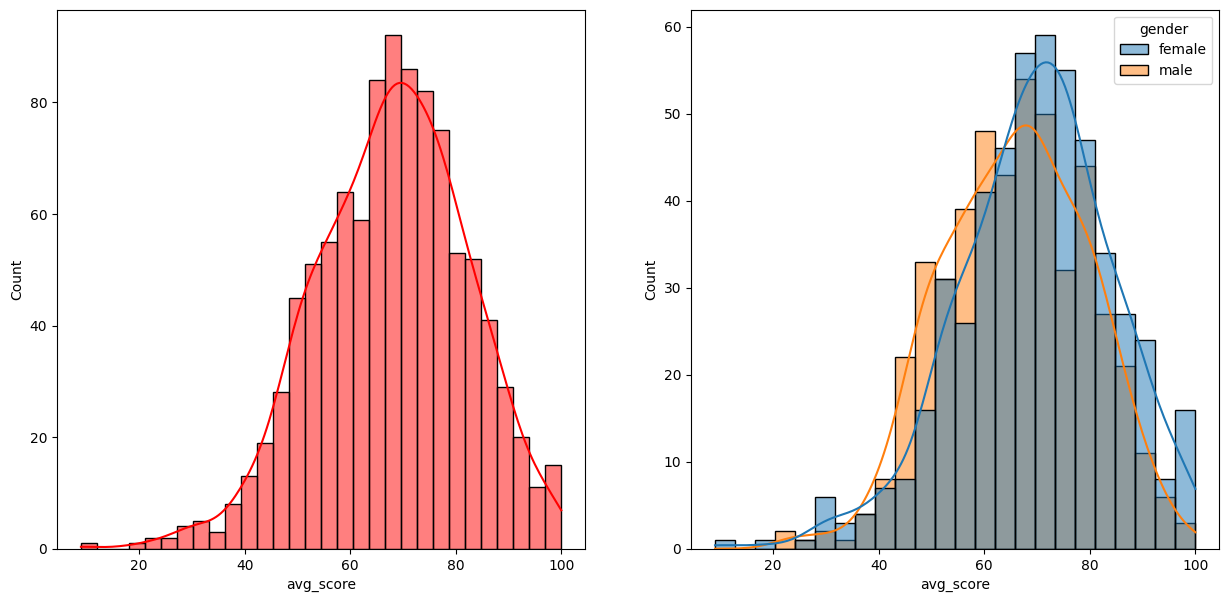

In [39]:
fig, axis = plt.subplots(1,2, figsize = (15,7))
plt.subplot(121)
sns.histplot(data = df, x = 'avg_score',bins = 30,kde=True,color = 'r')
plt.subplot(122)
sns.histplot(data = df, x = 'avg_score', kde = True, hue = 'gender')
plt.show()

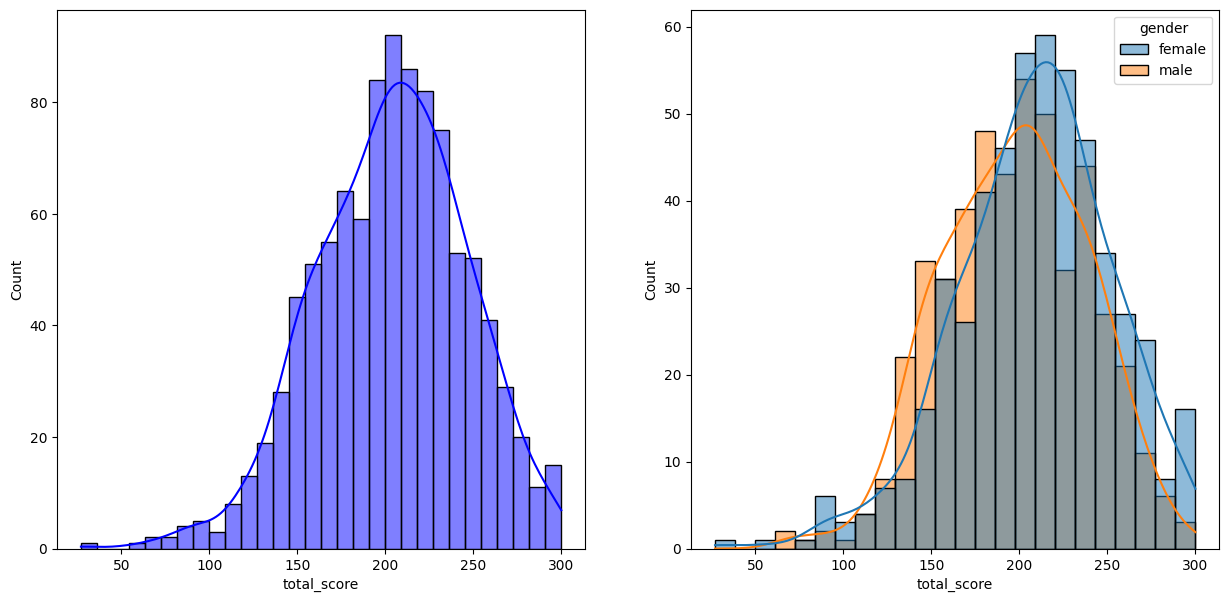

In [40]:
fig, axis = plt.subplots(1,2,figsize = (15,7))
plt.subplot(121)
sns.histplot(data = df, x = 'total_score', bins = 30, kde = True, color = 'b')
plt.subplot(122)
sns.histplot(data = df,x = 'total_score',kde = True, hue = 'gender')
plt.show()

# Insight

- Females are performing well in exams

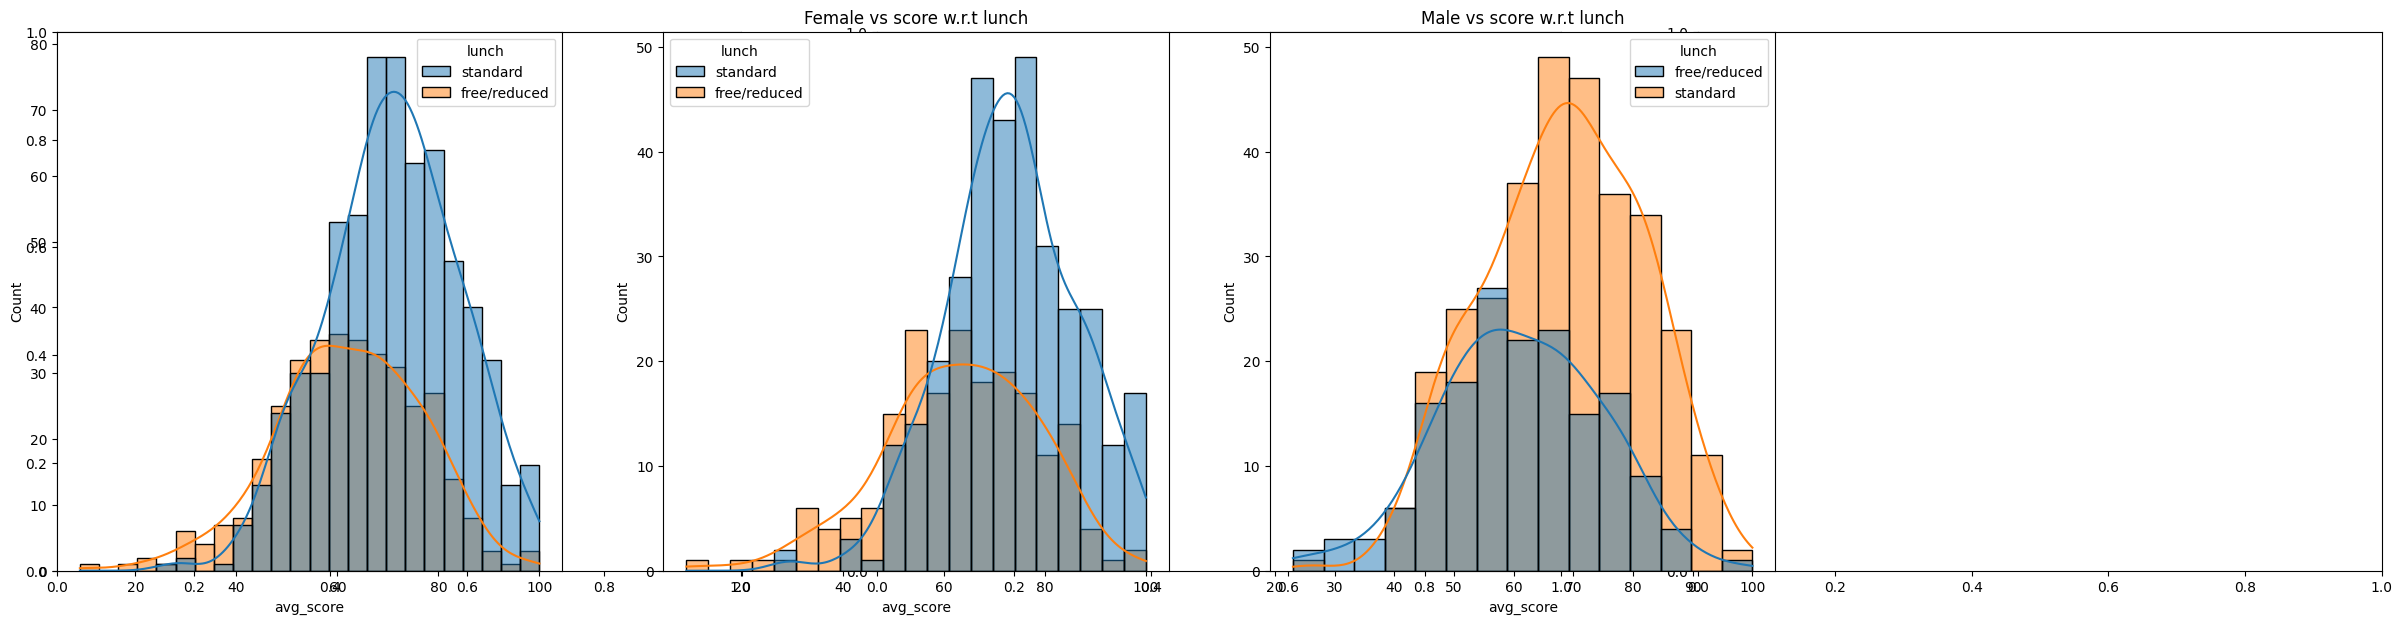

In [48]:
plt.subplots(1,3,figsize = (30,7))
plt.subplot(141)
sns.histplot(data = df,x = 'avg_score',kde = True,hue='lunch')
plt.subplot(142)
plt.title('Avg Score w.r.t lunch')
sns.histplot(data = df[df.gender == 'female'], x = 'avg_score', kde = True, hue = 'lunch')
plt.title('Female vs score w.r.t lunch')
plt.subplot(143)
sns.histplot(data = df[df.gender == 'male'], x = 'avg_score',kde = True,hue='lunch')
plt.title('Male vs score w.r.t lunch')
plt.show()

## Insight

- Students who are taking standard lunch are performing well 

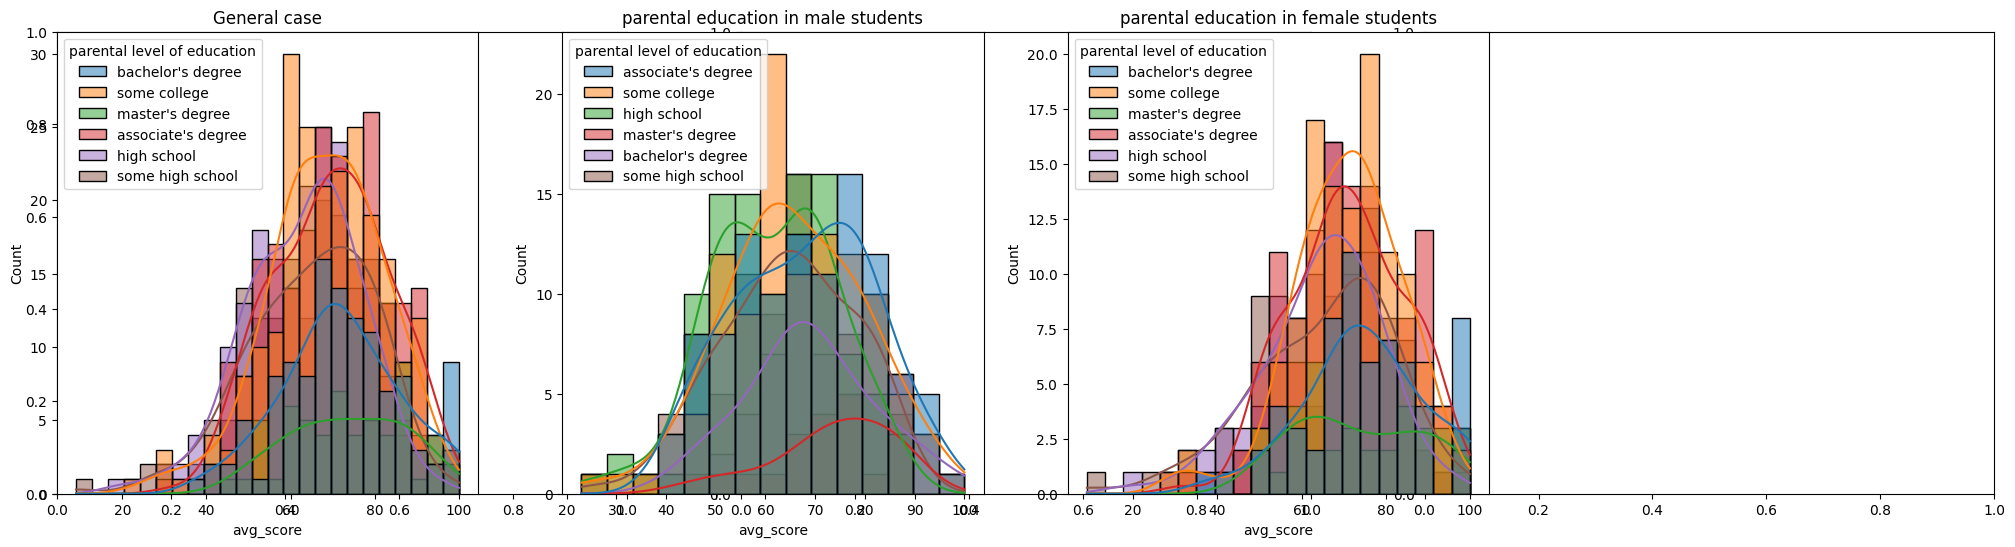

In [51]:
plt.subplots(1,3,figsize = (25,6))
plt.subplot(141)
ax = sns.histplot(data = df, x = 'avg_score',kde = True, hue = 'parental level of education')
plt.title('General case')
plt.subplot(142)
ax = sns.histplot(data = df[df.gender == 'male'], x = 'avg_score',kde = True, hue = 'parental level of education')
plt.title('parental education in male students')
plt.subplot(143)
ax = sns.histplot(data = df[df.gender == 'female'],x = 'avg_score',kde = True, hue = 'parental level of education')
plt.title('parental education in female students')
plt.show()

### Insight

- Parent's education doesn't help student's performance in the exam
- In the male students case parents with associate degree or master's degree their child are performing well in the exam
- There is no effect of parent's education in female student case